In [73]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
soft = torch.nn.Softmax(dim = 1)
ohot = torch.nn.functional.one_hot

In [75]:
txt = list('abc'*100) #문자열 리스트
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [76]:
df_train = pd.DataFrame({'x':txt[:-1],'y':txt[1:]})

In [77]:
df_train[:10] #훈련하고자 하는 데이터!

,x,y
0,a,b
1,b,c
2,c,a
3,a,b
4,b,c
5,c,a
6,a,b
7,b,c
8,c,a
9,a,b


In [97]:
x = torch.tensor(df_train['x'].map({'a':0,'b':1,'c':2})) #정수화 된 정보.. (라벨)
y = torch.tensor(df_train['y'].map({'a':0,'b':1,'c':2}))

In [98]:
ohot(x)[:5] #원핫 인코딩의 결과

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]])

In [102]:
#하나의 은닉 노드로 적합해보자
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(3,1),
    torch.nn.Tanh(), #이거 암기.. 순홚신경망에서는 Sigmoid 보다도 Tanh 라는 함수가 더 많이 쓰임.
    torch.nn.Linear(1,3) #결국은 세개중에 하나를 맞춰야 하니껜..
    # torch.nn.Softmax() #생략... CrossEntropyLoss를 쓸 예정
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr = 0.1)

In [103]:
for epoc in range(50):
  ##1
  yhat = net(x)
  ##2
  loss = loss_fn(yhat,y)
  ##3
  loss.backward()
  ##4
  optimizr.step()
  optimizr.zero_grad()

In [104]:
soft(yhat).data.numpy().round(2)[:10] #a 다음 b는 잘 맞추고,, b 다음 c는 좀 애매,,, c다음 a도 애매
#초기값의 차이인가? 맞기도 함

array([[0.09, 0.8 , 0.11],
       [0.  , 0.14, 0.86],
       [0.89, 0.11, 0.  ],
       [0.09, 0.8 , 0.11],
       [0.  , 0.14, 0.86],
       [0.89, 0.11, 0.  ],
       [0.09, 0.8 , 0.11],
       [0.  , 0.14, 0.86],
       [0.89, 0.11, 0.  ],
       [0.09, 0.8 , 0.11]], dtype=float32)

In [106]:
yhat.argmax(axis = 1) == y #다맞춤

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [107]:
net

Sequential(
  (0): Embedding(3, 1)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=3, bias=True)
)

In [108]:
ebdd, tanh, linr = net #네트워크 언패킹

In [109]:
ebdd_x = ebdd(x).data[:10]

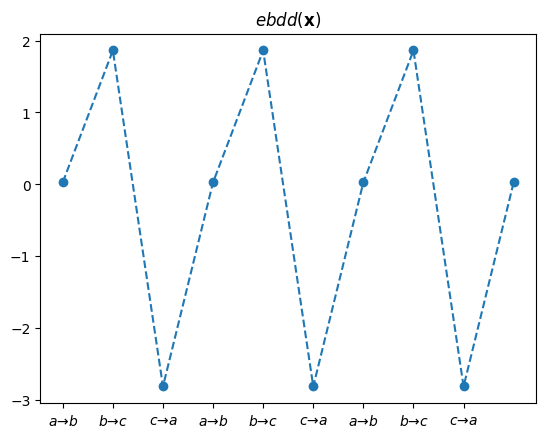

In [110]:
plt.plot(ebdd_x,'o--')
plt.title(r"$ebdd({\bf x})$")
plt.title(r"$ebdd({\bf x})$")
plt.xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);

In [111]:
h = tanh(ebdd_x)
torch.concat([ebdd_x,h],axis = 1) #값들이 0과 1 사이로 눌림.

tensor([[ 0.0287,  0.0287],
        [ 1.8616,  0.9528],
        [-2.8092, -0.9928],
        [ 0.0287,  0.0287],
        [ 1.8616,  0.9528],
        [-2.8092, -0.9928],
        [ 0.0287,  0.0287],
        [ 1.8616,  0.9528],
        [-2.8092, -0.9928],
        [ 0.0287,  0.0287]])

In [112]:
netout = linr(h).data
netout

tensor([[-1.3637,  0.8247, -1.3384],
        [-4.9139,  1.2273,  2.9339],
        [ 2.5602,  0.3797, -6.0603],
        [-1.3637,  0.8247, -1.3384],
        [-4.9139,  1.2273,  2.9339],
        [ 2.5602,  0.3797, -6.0603],
        [-1.3637,  0.8247, -1.3384],
        [-4.9139,  1.2273,  2.9339],
        [ 2.5602,  0.3797, -6.0603],
        [-1.3637,  0.8247, -1.3384]])

In [113]:
torch.concat([ebdd_x,h,netout],axis =1)

tensor([[ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384],
        [ 1.8616,  0.9528, -4.9139,  1.2273,  2.9339],
        [-2.8092, -0.9928,  2.5602,  0.3797, -6.0603],
        [ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384],
        [ 1.8616,  0.9528, -4.9139,  1.2273,  2.9339],
        [-2.8092, -0.9928,  2.5602,  0.3797, -6.0603],
        [ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384],
        [ 1.8616,  0.9528, -4.9139,  1.2273,  2.9339],
        [-2.8092, -0.9928,  2.5602,  0.3797, -6.0603],
        [ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384]])

In [114]:
netout_a = netout[:,[0]] #줄리아였으면 eachcol 박아버리는데 ㅋㅋ
netout_b = netout[:,[1]]
netout_c = netout[:,[2]]

In [115]:
linr.weight, linr.bias #3개의 output feature.. 3개의 bias..

(Parameter containing:
 tensor([[-3.8416],
         [ 0.4357],
         [ 4.6228]], requires_grad=True),
 Parameter containing:
 tensor([-1.2536,  0.8122, -1.4709], requires_grad=True))

In [116]:
torch.concat([h*-2.7688 - 0.0746,netout_a],axis=1) #같음~

tensor([[-0.1540, -1.3637],
        [-2.7128, -4.9139],
        [ 2.6742,  2.5602],
        [-0.1540, -1.3637],
        [-2.7128, -4.9139],
        [ 2.6742,  2.5602],
        [-0.1540, -1.3637],
        [-2.7128, -4.9139],
        [ 2.6742,  2.5602],
        [-0.1540, -1.3637]])

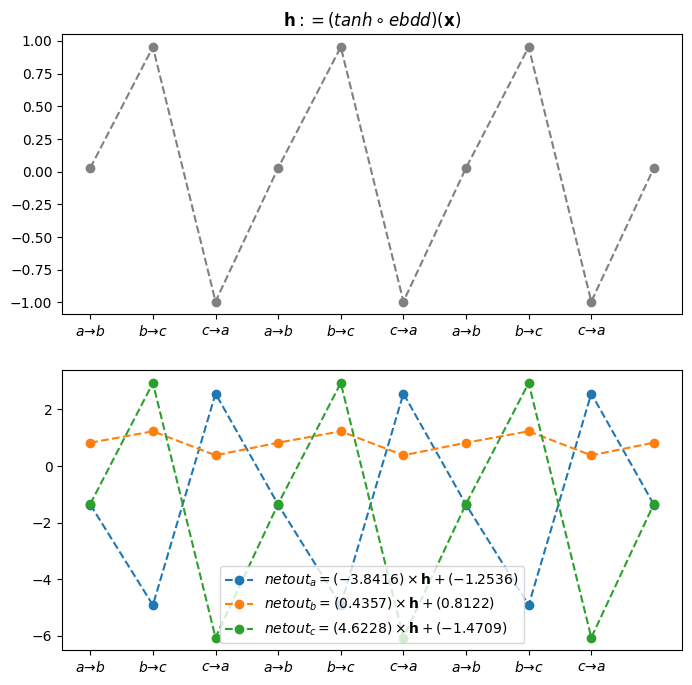

In [117]:
fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].plot(h, '--o', color='gray')
ax[0].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[0].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);
ax[1].plot(netout_a, '--o', label=r"$netout_a =  (-3.8416)\times {\bf h} + (-1.2536)$")
ax[1].plot(netout_b, '--o', label=r"$netout_b =  ( 0.4357)\times {\bf h} + (0.8122)$")
ax[1].plot(netout_c, '--o', label=r"$netout_c =  (4.6228)\times {\bf h} + (-1.4709)$")
ax[1].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);
ax[1].legend()

In [118]:
onehot_x = ohot(x).data[:9]
onehot_a = onehot_x[:,[0]] #원핫 중 a
onehot_b = onehot_x[:,[1]] #원핫 중 b
onehot_c = onehot_x[:,[2]] #원핫 중 c
#--#
ebdd_x = ebdd(x).data[:9]
#--#
h = tanh(ebdd(x)).data[:9]
#--#
netout = linr(tanh(ebdd(x))).data[:9]
netout_a = netout[:,[0]]
netout_b = netout[:,[1]]
netout_c = netout[:,[2]]
#--#
yhat = soft(net(x)).data[:9]
yhat_a = yhat[:,[0]]
yhat_b = yhat[:,[1]]
yhat_c = yhat[:,[2]]
#--#
torch.concat([ebdd_x,h,netout,yhat],axis=1).numpy().round(2)

array([[ 0.03,  0.03, -1.36,  0.82, -1.34,  0.09,  0.81,  0.09],
       [ 1.86,  0.95, -4.91,  1.23,  2.93,  0.  ,  0.15,  0.85],
       [-2.81, -0.99,  2.56,  0.38, -6.06,  0.9 ,  0.1 ,  0.  ],
       [ 0.03,  0.03, -1.36,  0.82, -1.34,  0.09,  0.81,  0.09],
       [ 1.86,  0.95, -4.91,  1.23,  2.93,  0.  ,  0.15,  0.85],
       [-2.81, -0.99,  2.56,  0.38, -6.06,  0.9 ,  0.1 ,  0.  ],
       [ 0.03,  0.03, -1.36,  0.82, -1.34,  0.09,  0.81,  0.09],
       [ 1.86,  0.95, -4.91,  1.23,  2.93,  0.  ,  0.15,  0.85],
       [-2.81, -0.99,  2.56,  0.38, -6.06,  0.9 ,  0.1 ,  0.  ]],
      dtype=float32)

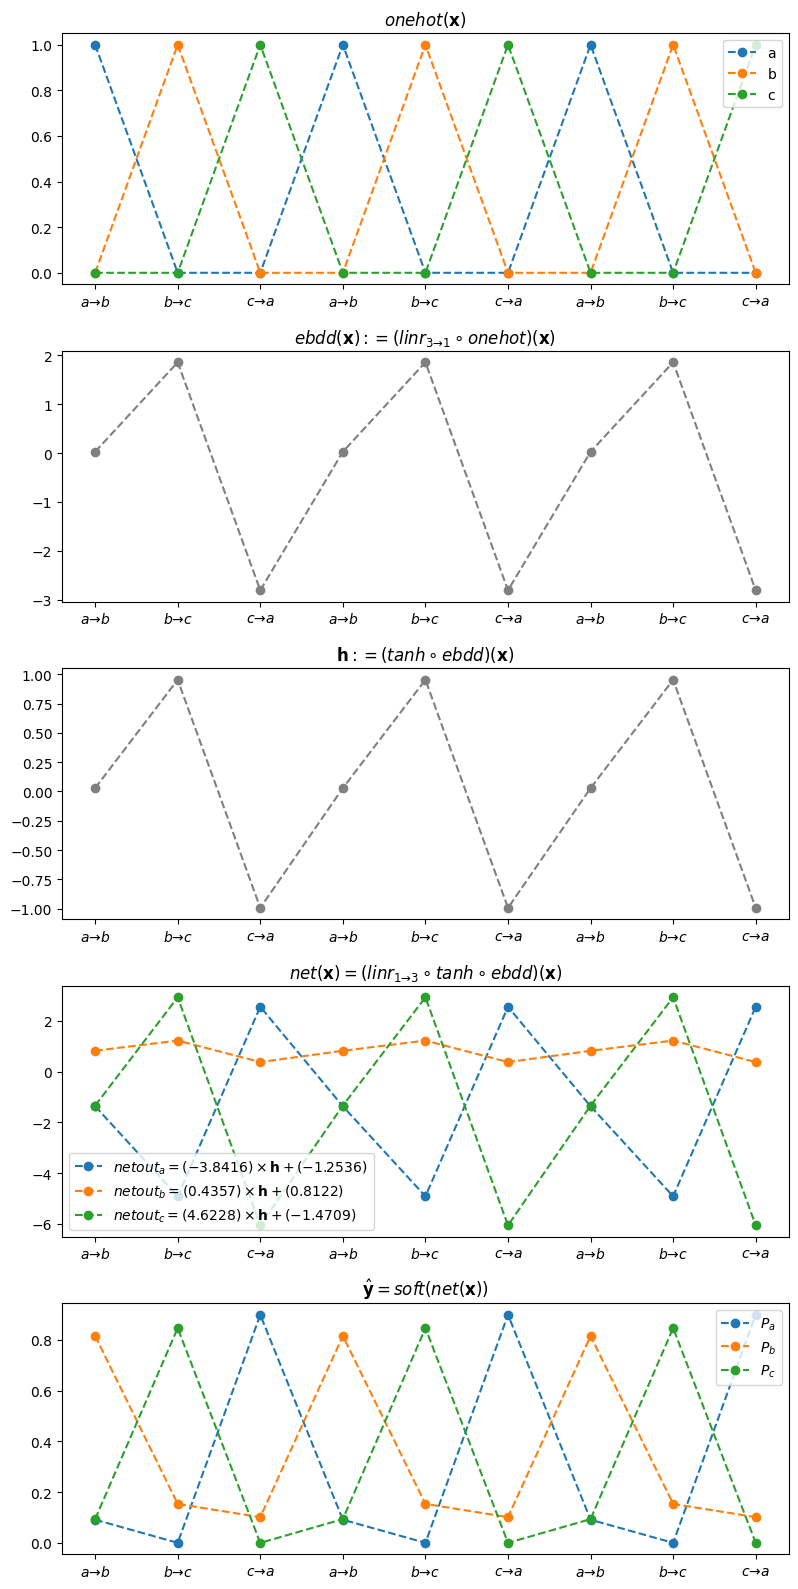

In [119]:
fig, ax = plt.subplots(5,1,figsize=(8,16))
ax[0].set_title(r"$onehot({\bf x})$")
ax[0].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[0].plot(onehot_a,'--o',label="a")
ax[0].plot(onehot_b,'--o',label="b")
ax[0].plot(onehot_c,'--o',label="c")
ax[0].legend() #원핫 인코딩 된 것만 1 나머지는 0
#--#
ax[1].set_title(r"$ebdd({\bf x}):=(linr_{3 \to 1} \circ onehot)({\bf x})$")
ax[1].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[1].plot(ebdd_x, '--o', color='gray')
#--#
ax[2].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[2].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[2].plot(h, '--o', color='gray')
#--#
ax[3].set_title(r"$net({\bf x})=(linr_{1 \to 3} \circ tanh \circ ebdd)({\bf x})$")
ax[3].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[3].plot(netout_a,'--o',label=r"$netout_a =  (-3.8416)\times {\bf h} + (-1.2536)$")
ax[3].plot(netout_b,'--o',label=r"$netout_b =  ( 0.4357)\times {\bf h} + (0.8122)$")
ax[3].plot(netout_c,'--o',label=r"$netout_c =  (4.6228)\times {\bf h} + (-1.4709)$")
ax[3].legend()
#--#
ax[4].set_title(r"$\hat{\bf y} = soft(net({\bf x}))$")
ax[4].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[4].plot(yhat_a,'--o',label=r"$P_a$")
ax[4].plot(yhat_b,'--o',label=r"$P_b$")
ax[4].plot(yhat_c,'--o',label=r"$P_c$")
ax[4].legend()
plt.tight_layout()

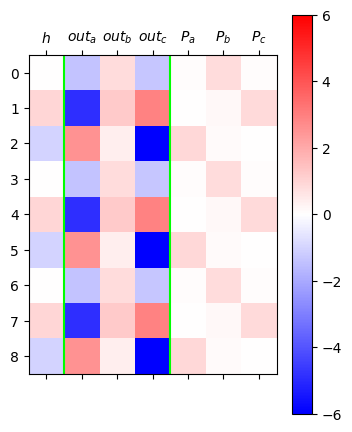

In [120]:
#### 다른 방식의 시각화
h = tanh(ebdd(x)).data[:9]
netout = linr(tanh(ebdd(x))).data[:9]
yhat = soft(net(x)).data[:9]
mat = torch.concat([h,netout,yhat],axis=1) #여러가지 값들이 들어있는 매트릭스.
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(0.5,color="lime")
plt.axvline(3.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=[r"$h$",r"$out_a$",r"$out_b$",r"$out_c$",r"$P_a$",r"$P_b$",r"$P_c$"]);
#여전히 b 의 net out은 미적지근함.
#미적지근 하다는 것은 h에 걸리는 가중치가 무색함.. h값이 0이니껜... 그래서 좀 더 확실히 구분해주는 임베딩 레이어를 설정하고싶음
#은닉 노드 수를 늘려볼까?

In [124]:
torch.manual_seed(43052)
net2 = torch.nn.Sequential(
    torch.nn.Embedding(3,2),
    torch.nn.Tanh(),
    torch.nn.Linear(2,3)
    #torch.nn.Softmax()
)
optimizr = torch.optim.Adam(net2.parameters(), lr=0.1) #? net.parameters() 로 받는거 까먹지 말자
loss_fn = torch.nn.CrossEntropyLoss()

In [125]:
for epoc in range(50):
  ##1
  yhat = net2(x)
  ##2
  loss = loss_fn(yhat,y)
  ##3
  loss.backward()
  ##4
  optimizr.step()
  optimizr.zero_grad()

In [132]:
soft(yhat).data.numpy().round(2)[:10].argmax(axis=1) , y[:10] #잘 맞춤

(array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1]), tensor([1, 2, 0, 1, 2, 0, 1, 2, 0, 1]))

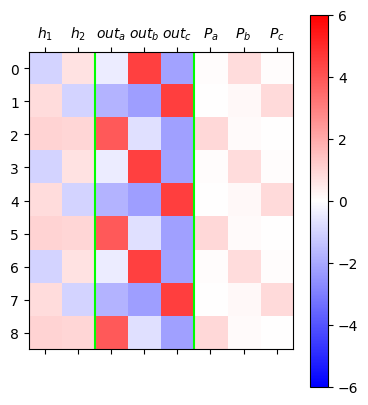

In [134]:
ebdd,tanh,linr = net2 #네트워크 언패킹
h = tanh(ebdd(x)).data[:9]
netout = linr(tanh(ebdd(x))).data[:9]
yhat = soft(net(x)).data[:9]
mat = torch.concat([h,netout,yhat],axis=1)
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(1.5,color="lime")
plt.axvline(4.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=[r"$h_1$",r"$h_2$",r"$out_a$",r"$out_b$",r"$out_c$",r"$P_a$",r"$P_b$",r"$P_c$"]);
#임베딩이 시원시원하게 되는고만!!!!
#h가 0이 아닌 값으로 구분되어있기 때문에 가중치의 의미를 살릴 수 있다..
#이러한 학습에서 중요한건 h -> out이 아니라 x -> h임

In [135]:
#### 'abcd'를 맞춰보아요
txt = list('abcd'*100)
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [138]:
df_train = pd.DataFrame({'x':txt[:-1],'y':txt[1:]})
df_train[:10]

,x,y
0,a,b
1,b,c
2,c,d
3,d,a
4,a,b
5,b,c
6,c,d
7,d,a
8,a,b
9,b,c


In [142]:
x = torch.tensor(df_train['x'].map({'a':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train['y'].map({'a':0,'b':1,'c':2,'d':3}))

In [155]:
#4개의 범주형 변수와 1개의 은닉노드
net = torch.nn.Sequential(
    torch.nn.Embedding(4,1),
    torch.nn.Tanh(),
    torch.nn.Linear(1,4)
    #torch.nn.Softmax()
)

ebdd,tanh,linr = net
ebdd.weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])
linr.weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
linr.bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000]) #초기값에 따라 학습 결과가 달라져서 이러한 초기값을 갖고 학습을 하고 관찰하자.

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

In [156]:
for epoc in range(50):
  ##1
  yhat = net(x)
  ##2
  loss = loss_fn(yhat, y)
  ##3
  loss.backward()
  ##4
  optimizr.step()
  optimizr.zero_grad()

In [157]:
soft(yhat.data).numpy().round(2)[:10] , ohot(y)[:10] #b랑 c를 구분을 못하는 상황 발생...

(array([[0.  , 0.82, 0.18, 0.  ],
        [0.11, 0.19, 0.7 , 0.  ],
        [0.08, 0.  , 0.  , 0.92],
        [0.77, 0.  , 0.11, 0.12],
        [0.  , 0.82, 0.18, 0.  ],
        [0.11, 0.19, 0.7 , 0.  ],
        [0.08, 0.  , 0.  , 0.92],
        [0.77, 0.  , 0.11, 0.12],
        [0.  , 0.82, 0.18, 0.  ],
        [0.11, 0.19, 0.7 , 0.  ]], dtype=float32),
 tensor([[0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1],
         [1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1],
         [1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 1, 0]]))

In [158]:
onehot_x = ohot(x).data[:8]
onehot_a = onehot_x[:,[0]]
onehot_b = onehot_x[:,[1]]
onehot_c = onehot_x[:,[2]]
onehot_d = onehot_x[:,[3]]
#--#
ebdd_x = ebdd(x).data[:8]
#--#
h = tanh(ebdd(x)).data[:8]
#--#
netout = linr(tanh(ebdd(x))).data[:8]
netout_a = netout[:,[0]]
netout_b = netout[:,[1]]
netout_c = netout[:,[2]]
netout_d = netout[:,[3]]
#--#
yhat = soft(net(x)).data[:8]
yhat_a = yhat[:,[0]]
yhat_b = yhat[:,[1]]
yhat_c = yhat[:,[2]]
yhat_d = yhat[:,[3]]
#--#

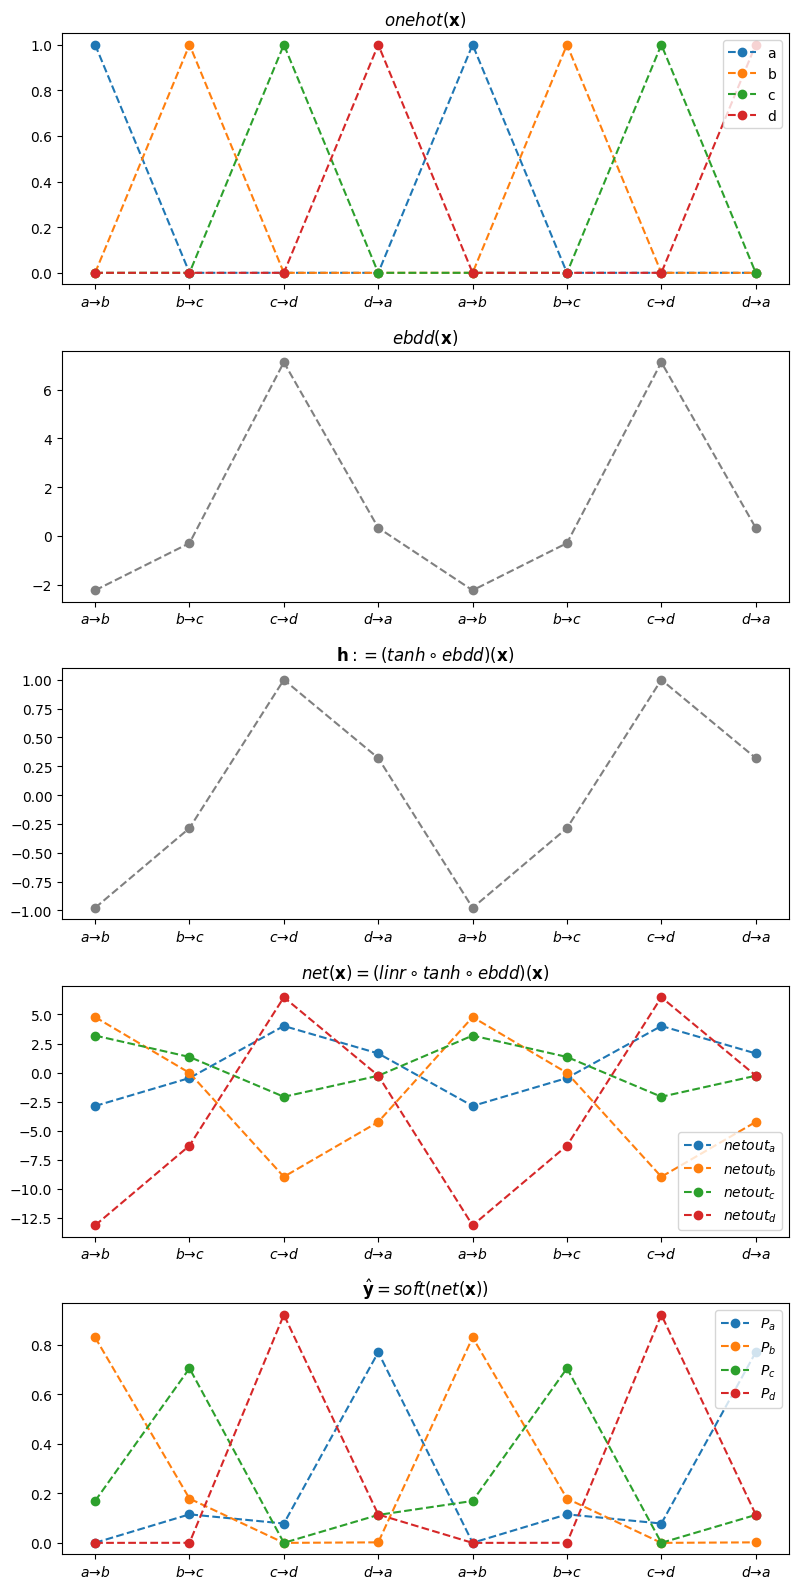

In [159]:
fig, ax = plt.subplots(5,1,figsize=(8,16))
ax[0].set_title(r"$onehot({\bf x})$")
ax[0].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[0].plot(onehot_a,'--o',label="a")
ax[0].plot(onehot_b,'--o',label="b")
ax[0].plot(onehot_c,'--o',label="c")
ax[0].plot(onehot_d,'--o',label="d")
ax[0].legend()
#--#
ax[1].set_title(r"$ebdd({\bf x})$")
ax[1].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[1].plot(ebdd_x, '--o', color='gray')
#--#
ax[2].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[2].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[2].plot(h, '--o', color='gray')
#--#
ax[3].set_title(r"$net({\bf x})=(linr \circ tanh \circ ebdd)({\bf x})$")
ax[3].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[3].plot(netout_a,'--o',label=r"$netout_a$")
ax[3].plot(netout_b,'--o',label=r"$netout_b$")
ax[3].plot(netout_c,'--o',label=r"$netout_c$")
ax[3].plot(netout_d,'--o',label=r"$netout_d$")
ax[3].legend()
#--#
ax[4].set_title(r"$\hat{\bf y} = soft(net({\bf x}))$")
ax[4].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[4].plot(yhat_a,'--o',label=r"$P_a$")
ax[4].plot(yhat_b,'--o',label=r"$P_b$")
ax[4].plot(yhat_c,'--o',label=r"$P_c$")
ax[4].plot(yhat_d,'--o',label=r"$P_d$")
ax[4].legend()
plt.tight_layout() #잘 맞추네.. 근데 이건 어쩌다 한번 잘 맞추는 경우에 불과... 유리한 초기값을 가졌기 때문..

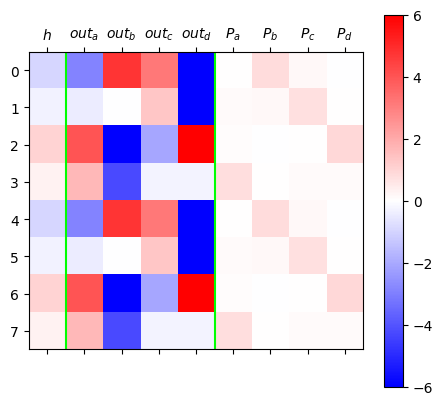

In [160]:
ebdd,tanh,linr = net
h = tanh(ebdd(x)).data[:8]
netout = linr(tanh(ebdd(x))).data[:8]
yhat = soft(net(x)).data[:8]
mat = torch.concat([h,netout,yhat],axis=1)
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(0.5,color="lime")
plt.axvline(4.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8],labels=[r"$h$",r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"]);
#c하고 a 맞출 땐 연함.. 임베딩 공간이 좀 모자르는 것 같음...
#c하고 a 맞출 땐 h값이 거의 0임.. 가중치가 역할을 못하는 상황

In [164]:
#### 두개의 은닉 노드 사용
net = torch.nn.Sequential(
    torch.nn.Embedding(4,2), #두개의 언닉노드
    torch.nn.Tanh(),
    torch.nn.Linear(2,4) #개를 맞춰야 하니까
    #torch.nn.Softmax()
)
ebdd, tanh, linr = net #언패킹 해주고 ㅋ
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr = 0.1)

In [165]:
for epoc in range(50):
  ##1
  yhat = net(x)
  ##2
  loss = loss_fn(yhat,y)
  ##3
  loss.backward()
  ##4
  optimizr.step()
  optimizr.zero_grad()

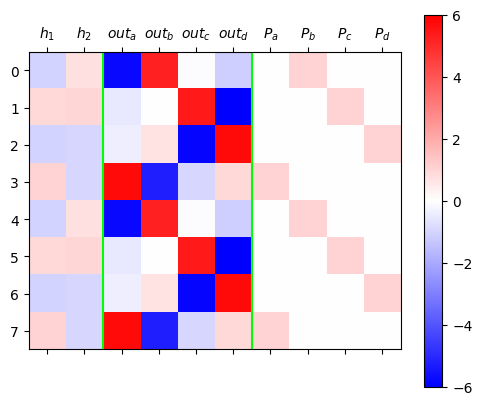

In [166]:
ebdd,tanh,linr = net
h = tanh(ebdd(x)).data[:8]
netout = linr(tanh(ebdd(x))).data[:8]
yhat = soft(net(x)).data[:8]
mat = torch.concat([h,netout,yhat],axis=1)
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(1.5,color="lime")
plt.axvline(5.5,color="lime")
plt.xticks(ticks=range(10),labels=[r"$h_1$",r"$h_2$",r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"]);
#쨍하게 학습 잘 된다.

In [172]:
#### 사용자 정의 네트워크로 구현해보기

class Net1(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.ebdd = torch.nn.Embedding(4,1)
    self.tanh = torch.nn.Tanh()
    self.linr = torch.nn.Linear(1,4)

  def forward(self,x):
    ebdd_x = self.ebdd(x)
    h = self.tanh(ebdd_x)
    netout = self.linr(h)

    return netout

#### 사용자 정의 네트워크로 구현해보기

class Net2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.ebdd = torch.nn.Embedding(4,2)
    self.tanh = torch.nn.Tanh()
    self.linr = torch.nn.Linear(2,4)

  def forward(self,x):
    ebdd_x = self.ebdd(x)
    h = self.tanh(ebdd_x)
    netout = self.linr(h)

    return netout

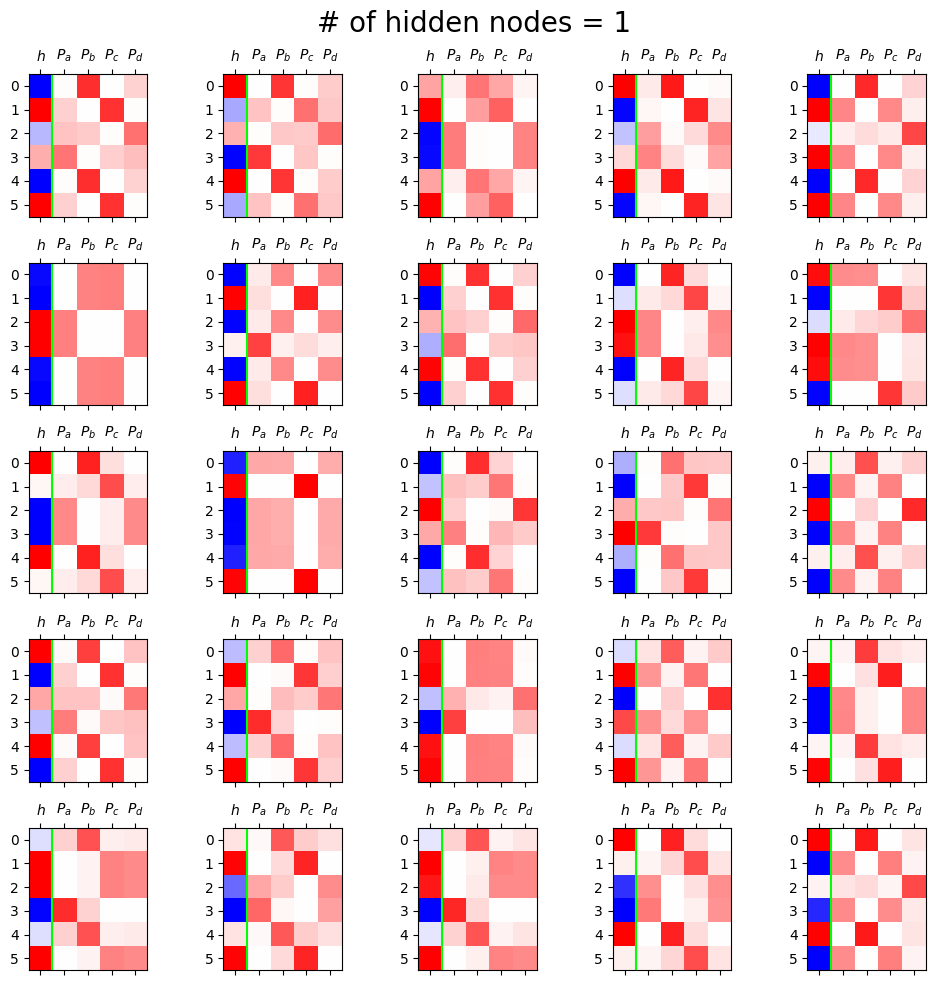

In [173]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net1()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1
            netout = net(x)
            ## 2
            loss = loss_fn(netout,y)
            ## 3
            loss.backward()
            ## 4
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data[:6]
        yhat = soft(net(x)).data[:6]
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat,cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(0.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4],labels=[r"$h$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"])
fig.suptitle("# of hidden nodes = 1", size=20)
fig.tight_layout()

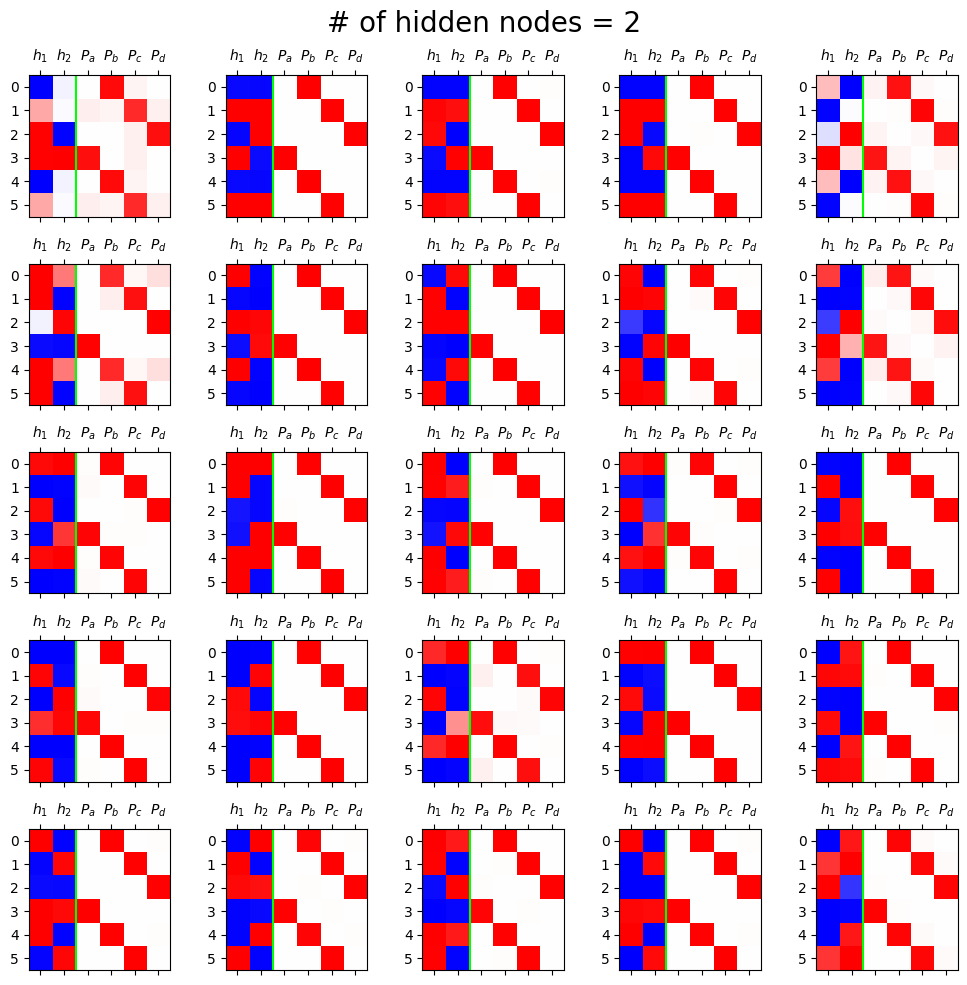

In [174]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net2()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1
            netout = net(x)
            ## 2
            loss = loss_fn(netout,y)
            ## 3
            loss.backward()
            ## 4
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data[:6]
        yhat = soft(net(x)).data[:6]
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat,cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(1.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4,5],labels=[r"$h_1$",r"$h_2$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"])
fig.suptitle("# of hidden nodes = 2", size=20)
fig.tight_layout() #임베딩 공간을 넉넉히 쓰니깐 학습이 아주 잘됨 .

#### h의 해석

h는 원핫 인코딩을 액기스를 뽑아서 숙성시킨 것이다..
- h는 x보다 y를 예측하는데 있어서 더 직접적인 역할을 한다.. x보다 숫자가 잘 정리되어 있고(차원이 낮고) 입력값의 특징을 더 잘 캐치한 값이다.(mbti 추천시스템에서 성향 점수  같은 느낌)
- 이 문제에서 h1,h2 를 임베딩 스페이스라고 한다.
- x는 학습 없이 주어진 그대로의 숫자지만, h는 학습을 통해 나온(숙성된) 액기스 값.